In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('ecommerce superstore.csv')
df.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


In [4]:
df.isnull().sum()

Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
df.columns

Index(['Transaction_ID', 'User_Name', 'Age', 'Country', 'Product_Category',
       'Purchase_Amount', 'Payment_Method', 'Transaction_Date'],
      dtype='object')

In [7]:
df.rename(columns={'Purchase_Amount': 'Sales'}, inplace=True)

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Sales             50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Sales               0
Payment_Method      0
Transaction_Date    0
dtype: int64

In [9]:
df.describe()

,Transaction_ID,Age,Sales
count,50000.000000,50000.000000,50000.000000
mean,25000.500000,43.968680,503.159793
std,14433.901067,15.260578,286.563558
min,1.000000,18.000000,5.040000
25%,12500.750000,31.000000,255.450000
50%,25000.500000,44.000000,503.110000
75%,37500.250000,57.000000,751.162500
max,50000.000000,70.000000,999.980000


In [10]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

In [11]:
df['Month'] = df['Transaction_Date'].dt.to_period('M')
df['Year'] = df['Transaction_Date'].dt.year

In [12]:
print("Total Transactions:", df['Transaction_ID'].nunique())

Total Transactions: 50000


In [13]:
print("Total Sales:", df['Sales'].sum())
print("Average Sale:", df['Sales'].mean())
print("Max Sale:", df['Sales'].max())

Total Sales: 25157989.65
Average Sale: 503.159793
Max Sale: 999.98


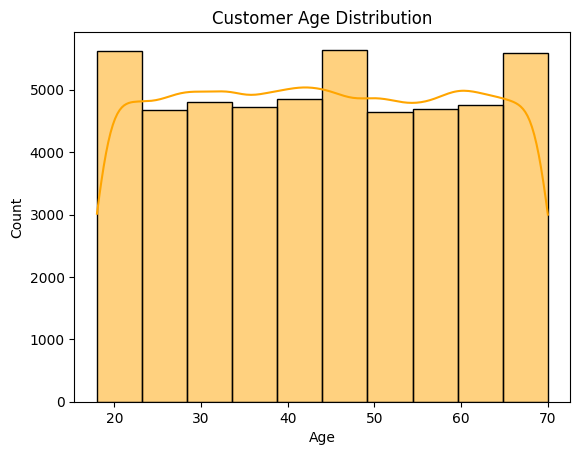

In [14]:
sns.histplot(df['Age'], kde=True, bins=10, color='orange')
plt.title("Customer Age Distribution")
plt.show()

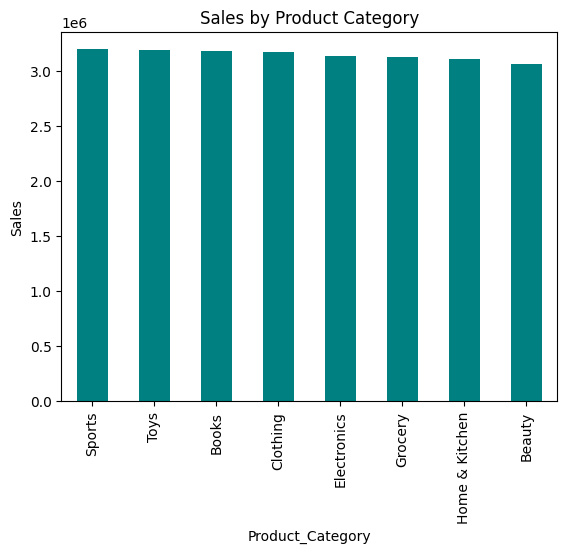

In [15]:
df.groupby('Product_Category')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Sales by Product Category")
plt.ylabel("Sales")
plt.show()

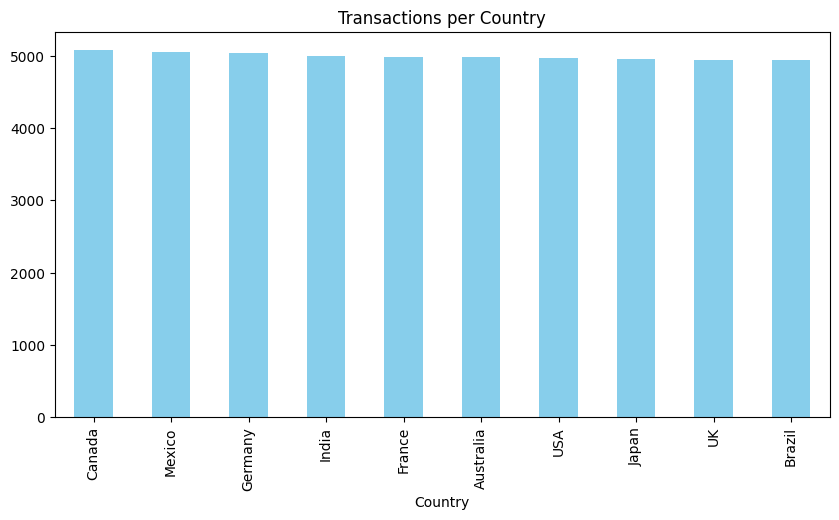

In [16]:
df['Country'].value_counts().plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Transactions per Country")
plt.show()

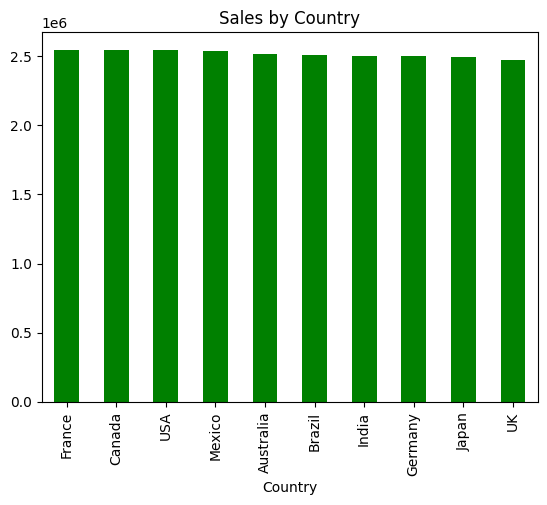

In [17]:
df.groupby('Country')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title("Sales by Country")
plt.show()

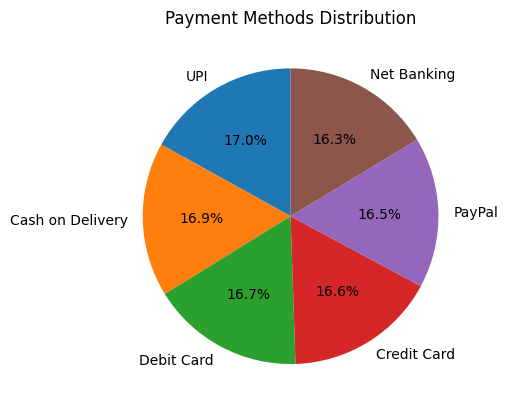

In [18]:
df['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Payment Methods Distribution")
plt.ylabel("")
plt.show()

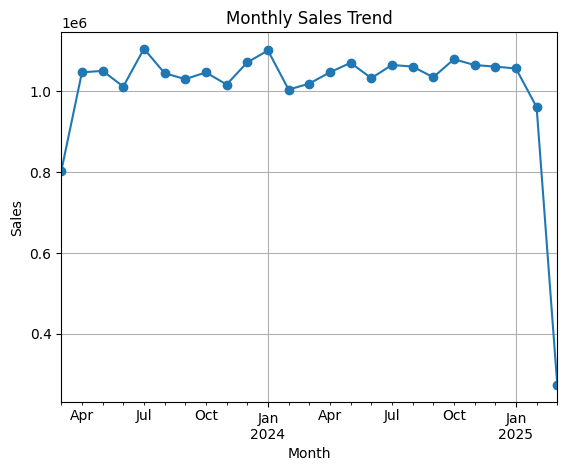

In [19]:
df.groupby('Month')['Sales'].sum().plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid()
plt.show()

In [20]:
df.groupby('User_Name')['Sales'].sum().sort_values(ascending=False).head(5)

User_Name
Sophia Harris    296354.98
James Allen      278079.15
Olivia Hall      277302.09
Isabella Hall    275798.04
Noah Anderson    274347.15
Name: Sales, dtype: float64

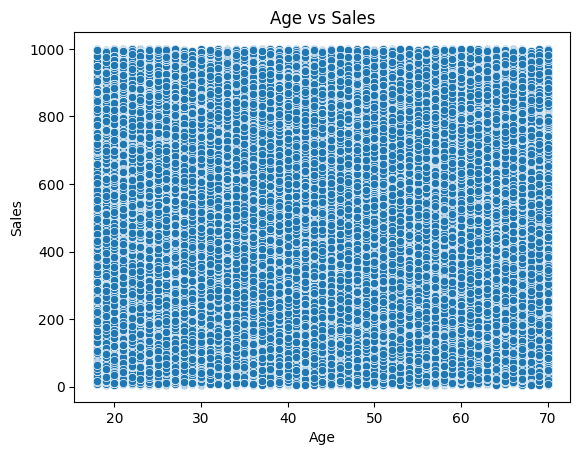

In [21]:
sns.scatterplot(x='Age', y='Sales', data=df)
plt.title("Age vs Sales")
plt.show()

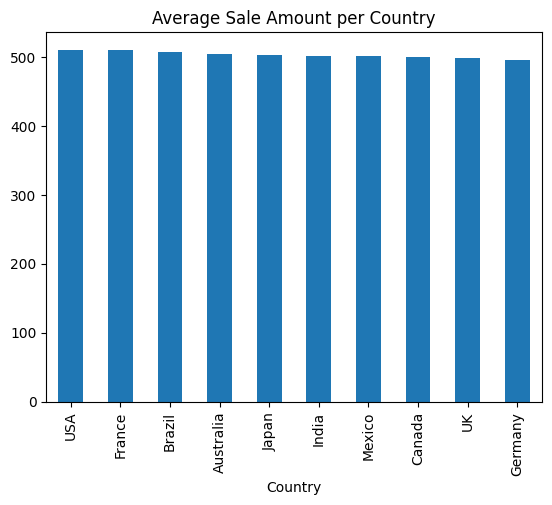

In [22]:
df.groupby('Country')['Sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Sale Amount per Country")
plt.show()

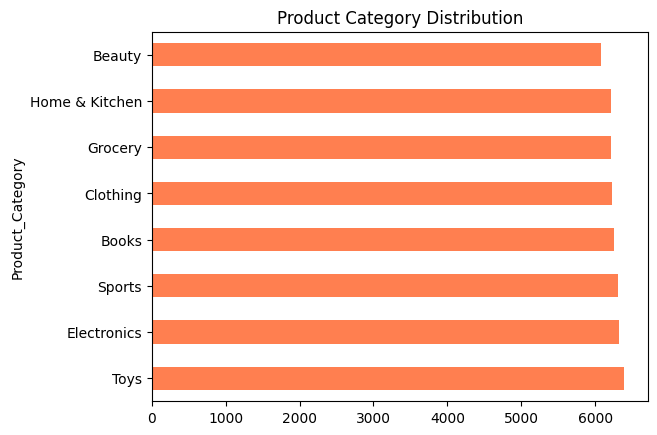

In [23]:
df['Product_Category'].value_counts().plot(kind='barh', color='coral')
plt.title("Product Category Distribution")
plt.show()

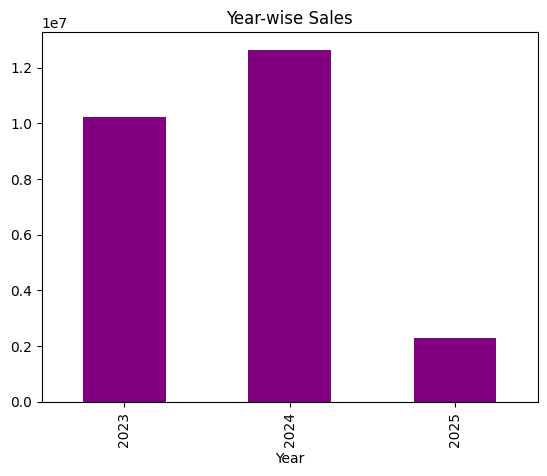

In [24]:
df.groupby('Year')['Sales'].sum().plot(kind='bar', color='purple')
plt.title("Year-wise Sales")
plt.show()

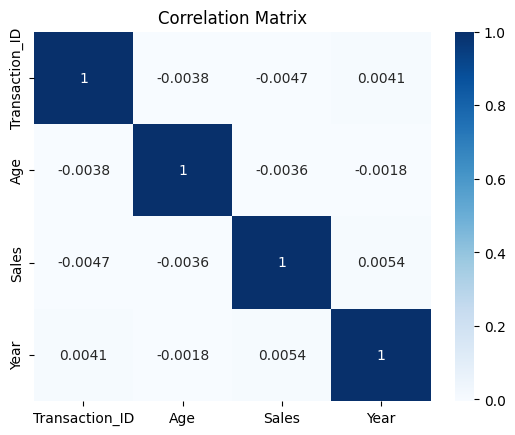

In [25]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [26]:
print("E-Commerce_Superstore_Project Successfully Completed")

E-Commerce_Superstore_Project Successfully Completed


In [27]:
df.to_csv('cleaned_ecommerce superstore.csv')